In [1]:
# Dependencies and Setup
%matplotlib notebook 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)
combined_df=pd.merge(mouse_df, clinical_df, on="Mouse ID", how="inner") 

In [3]:
# print(type(combined_df))
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
group_df=combined_df.groupby(['Drug','Timepoint'],as_index=False)
# group_df.head()
group_df=pd.DataFrame(group_df.mean())
group_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [5]:
drugs=group_df['Drug'].unique()
# drugs

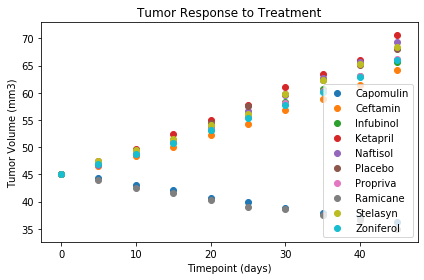

In [6]:
markers=["o","v","^","<",">","s","+","x","X","D"]
for drug in drugs:
    i=0
    xaxis=group_df.loc[group_df['Drug']==drug]['Timepoint']
    yaxis=group_df.loc[group_df['Drug']==drug]['Tumor Volume (mm3)']
    plt.scatter(xaxis,yaxis,marker=markers[i],label=drug)
    plt.legend(loc="best") 
    plt.title("Tumor Response to Treatment") 
    plt.xlabel("Timepoint (days)") 
    plt.ylabel("Tumor Volume (mm3)")
    i=i+1
    plt.tight_layout()    
    
# Why is the marker not showing? How to draw a line connecting them? Why doesn't the legend move?

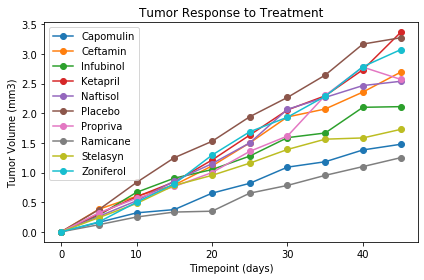

In [7]:
markers=["o","v","^","<",">","s","+","x","X","D"]
for drug in drugs:
    i=0
    xaxis=group_df.loc[group_df['Drug']==drug]['Timepoint']
    yaxis=group_df.loc[group_df['Drug']==drug]['Metastatic Sites']
    plt.plot(xaxis,yaxis,marker=markers[i],label=drug)
    plt.legend(loc="best") 
    plt.title("Tumor Response to Treatment") 
    plt.xlabel("Timepoint (days)") 
    plt.ylabel("Tumor Volume (mm3)") 
    i=i+1
    plt.tight_layout() 

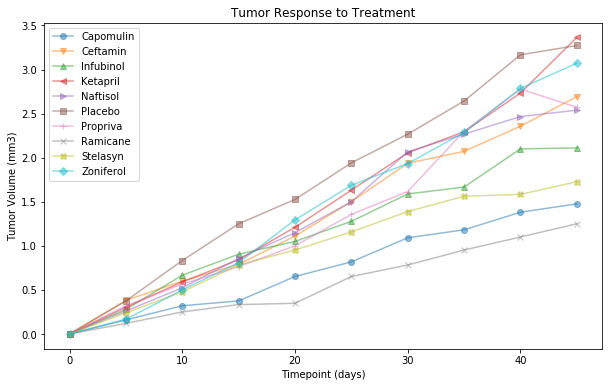

In [8]:
plt.figure(figsize=(10,6))
for i in range(len(markers)):
    xaxis=group_df.loc[group_df['Drug']==drugs[i]]['Timepoint']
    yaxis=group_df.loc[group_df['Drug']==drugs[i]]['Metastatic Sites']
    
    plt.plot(xaxis,yaxis,marker=markers[i],label=drugs[i], alpha=0.5)
    plt.legend(loc="best") 
    plt.title("Tumor Response to Treatment") 
    plt.xlabel("Timepoint (days)") 
    plt.ylabel("Tumor Volume (mm3)") ;

In [9]:
# survive_df=combined_df.groupby(['Drug','Mouse ID'],as_index=False)
# survive_df=pd.DataFrame(survive_df.max())

# # What does df.max() returns if there are several numerical columns? The first column first?

# survive_df.head()

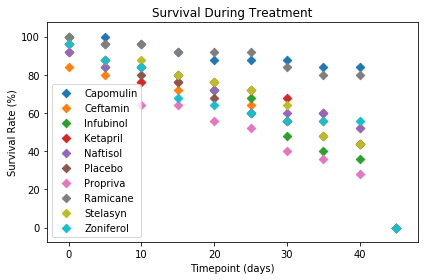

In [10]:
survive_df=combined_df.groupby(['Drug','Mouse ID'],as_index=False)
survive_df=pd.DataFrame(survive_df.max())
markers=["o","v","^","<",">","s","+","x","X","D"]
time=[0,5,10,15,20,25,30,35,40,45]
for drug in drugs:
    survival_rate=[]
    dead_mouse=0
    total_mouse=len(survive_df.loc[survive_df['Drug']==drug]['Mouse ID'])
    for i in range(len(time)):
        dead_mouse+=len(survive_df.loc
                       [(survive_df['Timepoint']==time[i]) 
                        & (survive_df['Drug']==drug)]['Mouse ID'])
        # need () when doing df.loc[df['c1']>a & df['c2']>b], like df.loc[(df['c1']>a) & (df['c2']>b)]
        survival_rate.append((total_mouse-dead_mouse)*100 / total_mouse)
    #print(survival_rate)
    plt.scatter(time,survival_rate,marker=markers[i],label=drug)
 
plt.legend(loc="best") 
plt.title("Survival During Treatment") 
plt.xlabel("Timepoint (days)") 
plt.ylabel("Survival Rate (%)") 
plt.tight_layout()

In [11]:
survive_df=combined_df.groupby(['Drug','Mouse ID'],as_index=False)
survive_end=pd.DataFrame(survive_df.max())
survive_begin=pd.DataFrame(survive_df.min())
tumor_percent=[]
for drug in drugs:
    begin_tumor=survive_begin.loc[survive_begin['Drug']==drug]['Tumor Volume (mm3)'].sum()
    end_tumor=survive_end.loc[survive_end['Drug']==drug]['Tumor Volume (mm3)'].sum()
    tumor_percent.append((end_tumor-begin_tumor) * 100 / begin_tumor)
#print(tumor_percent)

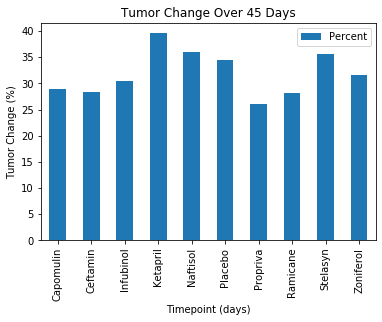

In [13]:
result={'Drugs':drugs,'Percent':tumor_percent}
result=pd.DataFrame.from_dict(result)
result.plot.bar(x='Drugs', y='Percent')
plt.legend(loc="best") 
plt.title("Tumor Change Over 45 Days") 
plt.xlabel("Timepoint (days)") 
plt.ylabel("Tumor Change (%)");
#plt.tight_layout()

In [ ]:
# plt.bar(drugs, tumor_percent, color='r', alpha=0.5, align="center") 
# x_axis = np.arange(len(drugs)) 
# tick_locations = [value for value in x_axis] 
# plt.xticks(tick_locations, drugs) 

In [ ]:
# survive_df=combined_df.groupby(['Drug','Mouse ID'],as_index=False)
# begin_tumor=survive_df.min()['Tumor Volume (mm3)'].sum()
# begin_tumor